# Carry Tables

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import random
import math
import pickle
from tqdm.notebook import tqdm_notebook
import sys
sys.path.append('../')
import fn

In [2]:
%load_ext autoreload
%autoreload 2

## Display Carry Tables

In [24]:
b=4 #modulus

basic_table=1*(np.add.outer(np.arange(b),np.arange(b))>=b)
alt_table=np.array([[0,0,0,0],
                    [0,3,3,3],
                    [0,3,3,0],
                    [0,3,0,0]])

### Basic Table, depth $\in [1:3]$

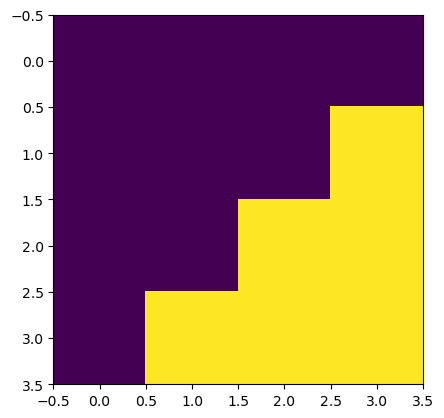

In [600]:
plt.imshow(fn.construct_product_table(basic_table, 1))

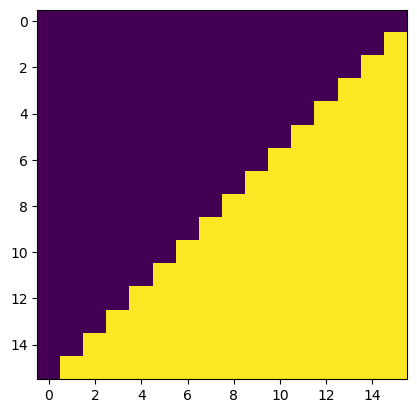

In [601]:
plt.imshow(fn.construct_product_table(basic_table, 2))

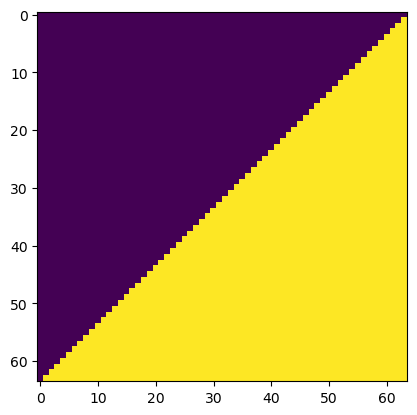

In [602]:
plt.imshow(fn.construct_product_table(basic_table, 3))

### Alternative Table, depth $\in [1:4]$

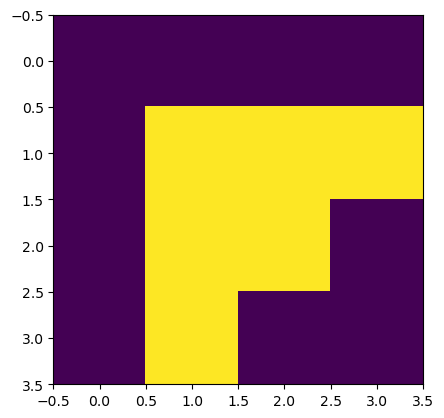

In [603]:
plt.imshow(fn.construct_product_table(alt_table, 1))

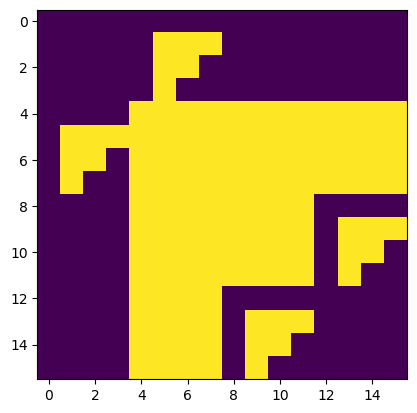

In [604]:
plt.imshow(fn.construct_product_table(alt_table, 2))

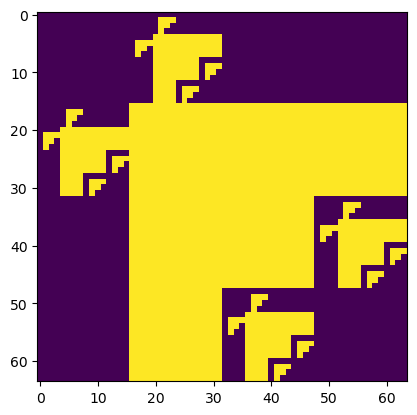

In [605]:
plt.imshow(fn.construct_product_table(alt_table, 3))

## Compare Carry Tables

### Find alternative cocycles

In [248]:
tables2 = fn.construct_tables(2, depth=3)

  0%|          | 0/1 [00:00<?, ?it/s]

In [250]:
tables3 = fn.construct_tables(3, depth=3, sample=20)

  0%|          | 0/3 [00:00<?, ?it/s]

In [251]:
tables4 = fn.construct_tables(4, depth=3, sample=20)

  0%|          | 0/16 [00:00<?, ?it/s]

In [252]:
tables5 = fn.construct_tables(5, depth=3, sample=20)

  0%|          | 0/125 [00:00<?, ?it/s]

In [254]:
tables6 = fn.construct_tables(6, depth=3, sample=20)

  0%|          | 0/1296 [00:00<?, ?it/s]

In [257]:
tables7 = fn.construct_tables(7, depth=3, sample=20)

  0%|          | 0/16807 [00:00<?, ?it/s]

In [258]:
tables8 = fn.construct_tables(8, depth=3, sample=20)

  0%|          | 0/262144 [00:00<?, ?it/s]

In [262]:
all_tables = {
    2: tables2,
    3: tables3,
    4: tables4,
    5: tables5,
    6: tables6,
    7: tables7,
    8: tables8,
}

### Plot carry tables

In [ ]:
with open('../pickles/carry_tables/all_tables_d1.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [ ]:
fn.show_tables(all_tables[2], 2, depth=1)

In [ ]:
fn.show_tables(all_tables[3], 3, depth=1)

In [ ]:
fn.show_tables(all_tables[4], 4, depth=1)

In [ ]:
fn.show_tables(all_tables[5], 5, depth=1)

In [ ]:
fn.show_tables(all_tables[6], 6, depth=1)

In [ ]:
fn.show_tables(all_tables[7], 7, depth=1)

In [ ]:
fn.show_tables(all_tables[8], 8, depth=1)

In [ ]:
fn.show_tables(all_tables[9], 9, depth=1)

### Compute fraction of zeros, number of unique digits, and estimated box-counting dimension for each table

In [ ]:
with open('../pickles/carry_tables/all_tables_d1.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [264]:
with open('../pickles/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [265]:
with open('../pickles/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

In [266]:
with open('../pickles/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

### Plot fraction of zeros, number of unique digits, and estimated box-counting dimension

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(frac_zeros_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 1, 5))
        if (i == 3) or (i == 7):
            ax.set_ylabel('fraction of zeros')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Fraction of Zeros vs. Depth')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(num_digits_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_yticks(range(i+4))
        ax.set_xlabel('depth')
        if (i == 3) or (i == 7):
            ax.set_ylabel('number of digits')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Number of Digits vs. Depth')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(est_dim_box_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 2, 9))
        if (i == 3) or (i == 7):
            ax.set_ylabel('est. box-counting dim.')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()